In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import semilogy
from scipy.stats import pearsonr
from scipy import stats
from itertools import combinations
import numpy as np

In [7]:
# Set directory path to current directory
dir_path = os.path.abspath('../')

dat = os.path.join(dir_path, 'results_v1.xlsx')
coef = os.path.join(dir_path, 'model3_output.xlsx')

Plot between country r-square and GDP
- r-square can be taken directly from model3_output.xlsx, sheet name coef-eleccum
- GDP need to be taken from results_v1.xlsx, sheet name standarized data

In [8]:
gdp_df = pd.read_excel(dat, index_col=0, sheet_name='standarized data')
rSquare_df = pd.read_excel(coef, index_col=0, sheet_name='coef-eleccum')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/handanz/OneDrive - Chalmers Students/Chalmers/dataset/OECD_CRS/model3_output.xlsx'

In [10]:
# Total sum of foreign aid for energy development
energy_aid = gdp_df['energy aid'].groupby('country').last()

# Country's current electrification rate (2019)
elec = gdp_df['elec_rate'].groupby('country').last()

# Adjusted r^2 values
rSquare = rSquare_df['r2 adj']

# Country's 2019 GDP value
gdp = gdp_df['gdp'].groupby('country').last()

# Country's GDP per capita use 2019 as a base
gdpPerCapita = rSquare_df['gdp/cap 2019']



# Country's sector specific sum of aid flows
policy = gdp_df['Energy Policy'].groupby('country').sum()
distribution = gdp_df['Energy distribution'].groupby('country').sum()
nrgen = gdp_df['Energy generation, non-renewable sources'].groupby('country').sum()
rgen = gdp_df['Energy generation, renewable sources'].groupby('country').sum()

country
Angola                       45.670315
Benin                        40.318741
Botswana                     70.183182
Burkina Faso                 18.379152
Burundi                      11.064797
Cabo Verde                   95.533539
Cameroon                     63.452312
Central African Republic     14.300000
Chad                          8.400000
Comoros                      84.048241
Cote d'Ivoire                68.550110
Eswatini                     77.169640
Ethiopia                     48.271622
Gabon                        90.685257
Gambia, The                  59.921288
Ghana                        83.500000
Guinea                       42.418388
Kenya                        69.700000
Lesotho                      44.640678
Madagascar                   26.907185
Malawi                       11.200000
Mali                         48.021248
Mauritania                   45.812069
Mauritius                   100.000000
Mozambique                   29.616161
Namibia          

NameError: name 'rSquare_df' is not defined

Text(0.5, 0, 'Foreign aid for energy ')

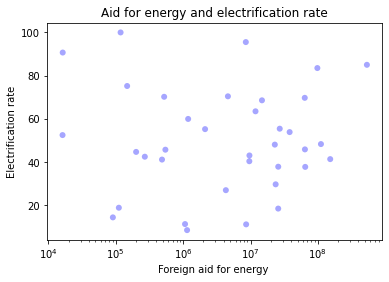

In [6]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(energy_aid, elec, c='blue', alpha=0.35, edgecolors='none')
# ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Aid for energy and electrification rate")
plt.ylabel("Electrification rate")
plt.xlabel("Foreign aid for energy ")

Text(0.5, 0, 'Foreign aid for energy ')

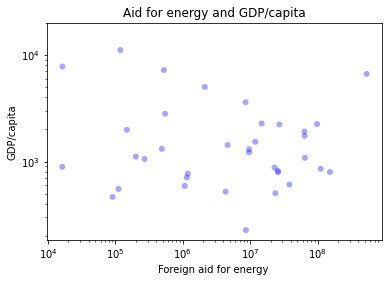

In [7]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(energy_aid, gdpPerCapita, c='blue', alpha=0.35, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Aid for energy and GDP/capita")
plt.ylabel("GDP/capita")
plt.xlabel("Foreign aid for energy ")

Text(0.5, 0, 'Foreign aid for energy policy')

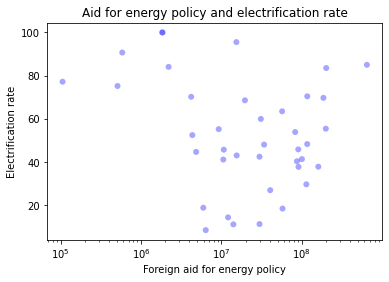

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(policy, elec, c='blue', alpha=0.35, edgecolors='none')
# ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Aid for energy policy and electrification rate")
plt.ylabel("Electrification rate")
plt.xlabel("Foreign aid for energy policy")

NameError: name 'gdp' is not defined

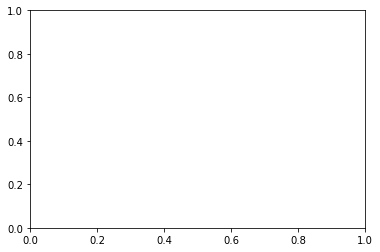

In [11]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(gdp, elec, c='blue', alpha=0.35, edgecolors='none')
# ax.set_yscale('log')
ax.set_xscale('log')

plt.title("GDP and electrification rate")
plt.ylabel("Electrification rate")
plt.xlabel("GDP/cap")

Scatter plotting between R-squared value and GDP level

Text(0.5, 0, 'Foreign aid for energy distribution')

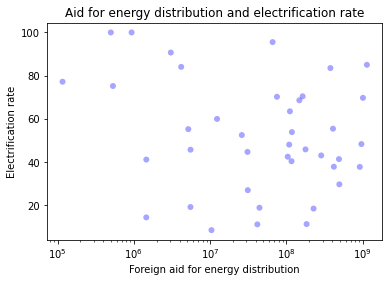

In [28]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(distribution, elec, c='blue', alpha=0.35, edgecolors='none')
# ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Aid for energy distribution and electrification rate")
plt.ylabel("Electrification rate")
plt.xlabel("Foreign aid for energy distribution")

Text(0.5, 0, 'Foreign aid for energy generation, non-renewable')

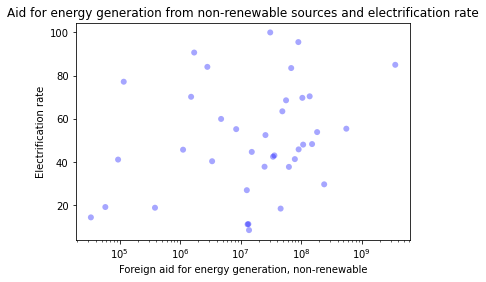

In [29]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(nrgen, elec, c='blue', alpha=0.35, edgecolors='none')
# ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Aid for energy generation from non-renewable sources and electrification rate")
plt.ylabel("Electrification rate")
plt.xlabel("Foreign aid for energy generation, non-renewable")

Text(0.5, 0, 'Foreign aid for renewable energy generation')

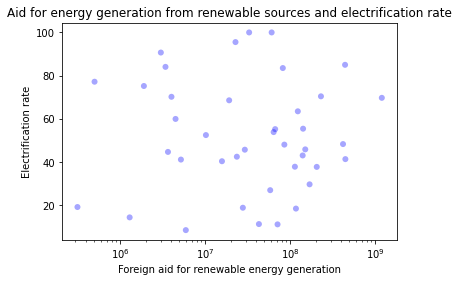

In [30]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(rgen, elec, c='blue', alpha=0.35, edgecolors='none')
# ax.set_yscale('log')
ax.set_xscale('log')

plt.title("Aid for energy generation from renewable sources and electrification rate")
plt.ylabel("Electrification rate")
plt.xlabel("Foreign aid for renewable energy generation")

Text(0, 0.5, 'GDP')

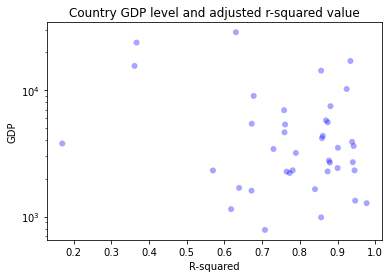

In [31]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(rSquare, gdp, c='blue', alpha=0.35, edgecolors='none')
ax.set_yscale('log')
# ax.set_xscale('log')

plt.title("Country GDP level and adjusted r-squared value")
plt.xlabel("R-squared")
plt.ylabel("GDP")


Text(0, 0.5, 'GDP per capita')

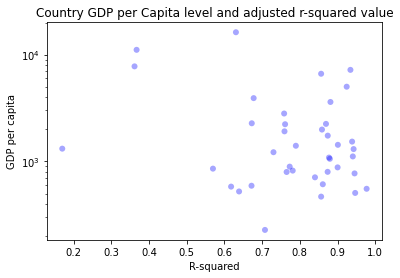

In [32]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(rSquare, gdpPerCapita, c='blue', alpha=0.35, edgecolors='none')
ax.set_yscale('log')
# ax.set_xscale('log')

plt.title("Country GDP per Capita level and adjusted r-squared value")
plt.xlabel("R-squared")
plt.ylabel("GDP per capita")

In [55]:
# Turn R-squared and GDP/cap into lists
rS = pd.Series(rSquare_df['r2 adj']).tolist()
gPC = pd.Series(rSquare_df['gdp/cap 2019']).tolist()

print(pearsonr(rS, gPC))

# Initiate a list and shove R-squared and GDP/cap into it
x = []
x.append(rS)
x.append(gPC)

rho = np.corrcoef(x)

print(rho)

(-0.32389794404695316, 0.04146183875978093)
[[ 1.         -0.32389794]
 [-0.32389794  1.        ]]


https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/
https://moonbooks.org/Articles/How-to-calculate-the-Pearsons-Correlation-coefficient-between-two-datasets-in-python-/

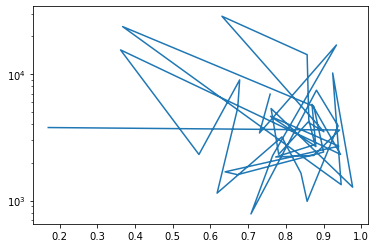

In [ ]:
semilogy(rSquare, gdp)